In [1]:
import os
import numpy as np
import matplotlib.pylab as plt
from PIL import Image
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

path = "D:/Bei/xhjh/project/data/"

path_e = path + "emui/"
path_i = path + "ios/"

WIDTH = 512
HEIGHT = 32
img_size = (WIDTH, HEIGHT)
os_class_dict = {
    0: "ios",
    1: "emui",
    2: "miui",
}
#os.listdir(path_i)
#os.listdir(path_e)

In [4]:
def get_image(path):
    #img = Image.open(path).convert('RGB')
    img = Image.open(path).convert('L')
    img = img.crop((0,0,img.width,int(0.06*img.width)))
    img = img.resize(img_size)
    img = np.array(img)
    return img

nam = []

def get_data(data_path):
    ret = []
    for name in os.listdir(data_path):
        #print(data_path+name)
        ret.append(get_image(data_path+name))
        nam.append(name)
    return np.array(ret)

def print_data(imgs):
    fig, axes = plt.subplots(10, 10, figsize=(20,20))
    axes = axes.flatten()
    for i in range(100):
        img=imgs[i]
        axes[i].set_title(f"shape={img.shape}")
        axes[i].imshow(img)
        axes[i].set_xticks([])
        axes[i].set_yticks([])
    plt.tight_layout()
    plt.show()

data_x=np.vstack((get_data(path_i),get_data(path_e)))

In [5]:
def get_size(path):
    return len(os.listdir(path))
data_y=np.hstack((np.full(get_size(path_i),0),np.full(get_size(path_e),1)))
print(data_x.shape)
print(data_y.shape)

(635, 32, 512)
(635,)


In [157]:
data_n=data_y.shape[0]
data_x=data_x.reshape(data_n,-1)
print(data_x.shape)

(576, 15000)
(59, 15000)


In [158]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knc = KNeighborsClassifier(n_neighbors=k)

In [159]:
knc.fit(train_data_x,train_data_y)

KNeighborsClassifier()

In [160]:
predict=knc.predict(test_data_x)

In [161]:
ac_num = np.sum(predict == test_data_y)
accuracy = ac_num / test_data_n
print("总测试样本 %d，正确样本 %d，准确度为 %f" % (test_data_n, ac_num, accuracy))

总测试样本 59，正确样本 50，准确度为 0.847458


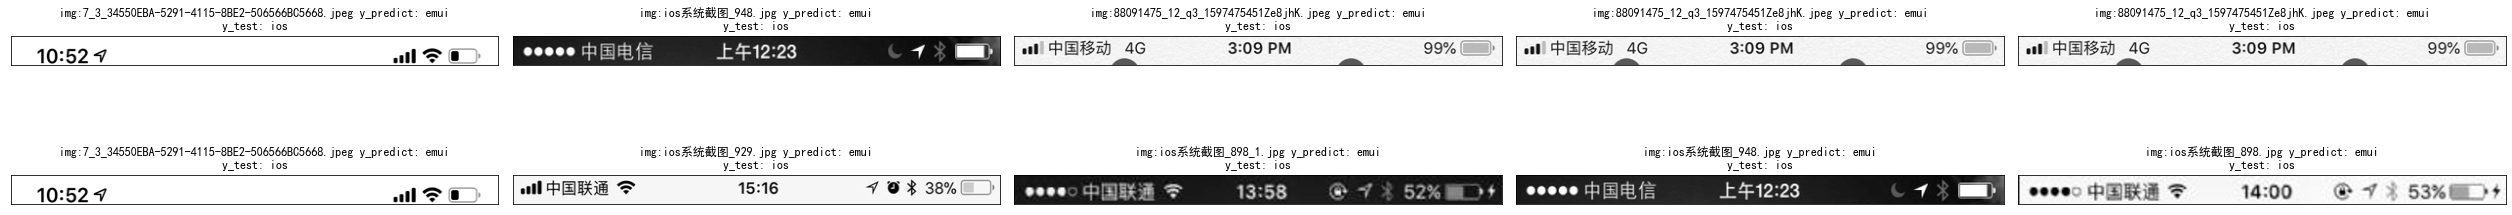

In [162]:
indice = np.random.choice(np.where(predict != test_data_y)[0], size=10)
fig, axes = plt.subplots(2, 5, figsize=(35, 5))
axes = axes.flatten()
for i, idx in enumerate(indice):
    #axes[i].imshow(test_data_x[idx].reshape(HEIGHT,WIDTH,3), cmap="gray_r")
    axes[i].imshow(test_data_x[idx].reshape(HEIGHT,WIDTH), cmap="gray")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title("img:%s y_predict: %s\ny_test: %s" % (test_nam[idx],os_class_dict[predict[idx]], os_class_dict[test_data_y[idx]]))
plt.tight_layout()
plt.show()